# Cell-cell communication (CCC)

## Introduction and installation

* Tool: CellphoneDB, liana, decoupler
* Github: None
* Paper: https://www.sc-best-practices.org/mechanisms/cell_cell_communication.html

In [4]:
!pip install liana
!pip install decoupler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 3.2 MB/s eta 0:00:00


## Python part

In [5]:
# python libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import liana as li
import decoupler as dc

import session_info

# import cellphonedb method via liana
from liana.method import cellphonedb
from liana.method import rank_aggregate

In [42]:
# figure settings
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200, facecolor="white")
sc.set_figure_params(figsize=(9, 5))

In [38]:
# Read in
adata = sc.read("../data/Preprocessed_data/preprocessed_harmony_.h5ad")
adata.obs_names_make_unique()
adata


/Users/Shared/anaconda3/envs/IDIMENSIONS/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [39]:
adata

AnnData object with n_obs × n_vars = 7736 × 33694
    obs: 'batch', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'log_norm', 'norm', 'raw', 'scale_data', 'counts'
    obsp: 'connectivities', 'distances'

In [40]:
adata.obs["leiden"].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')

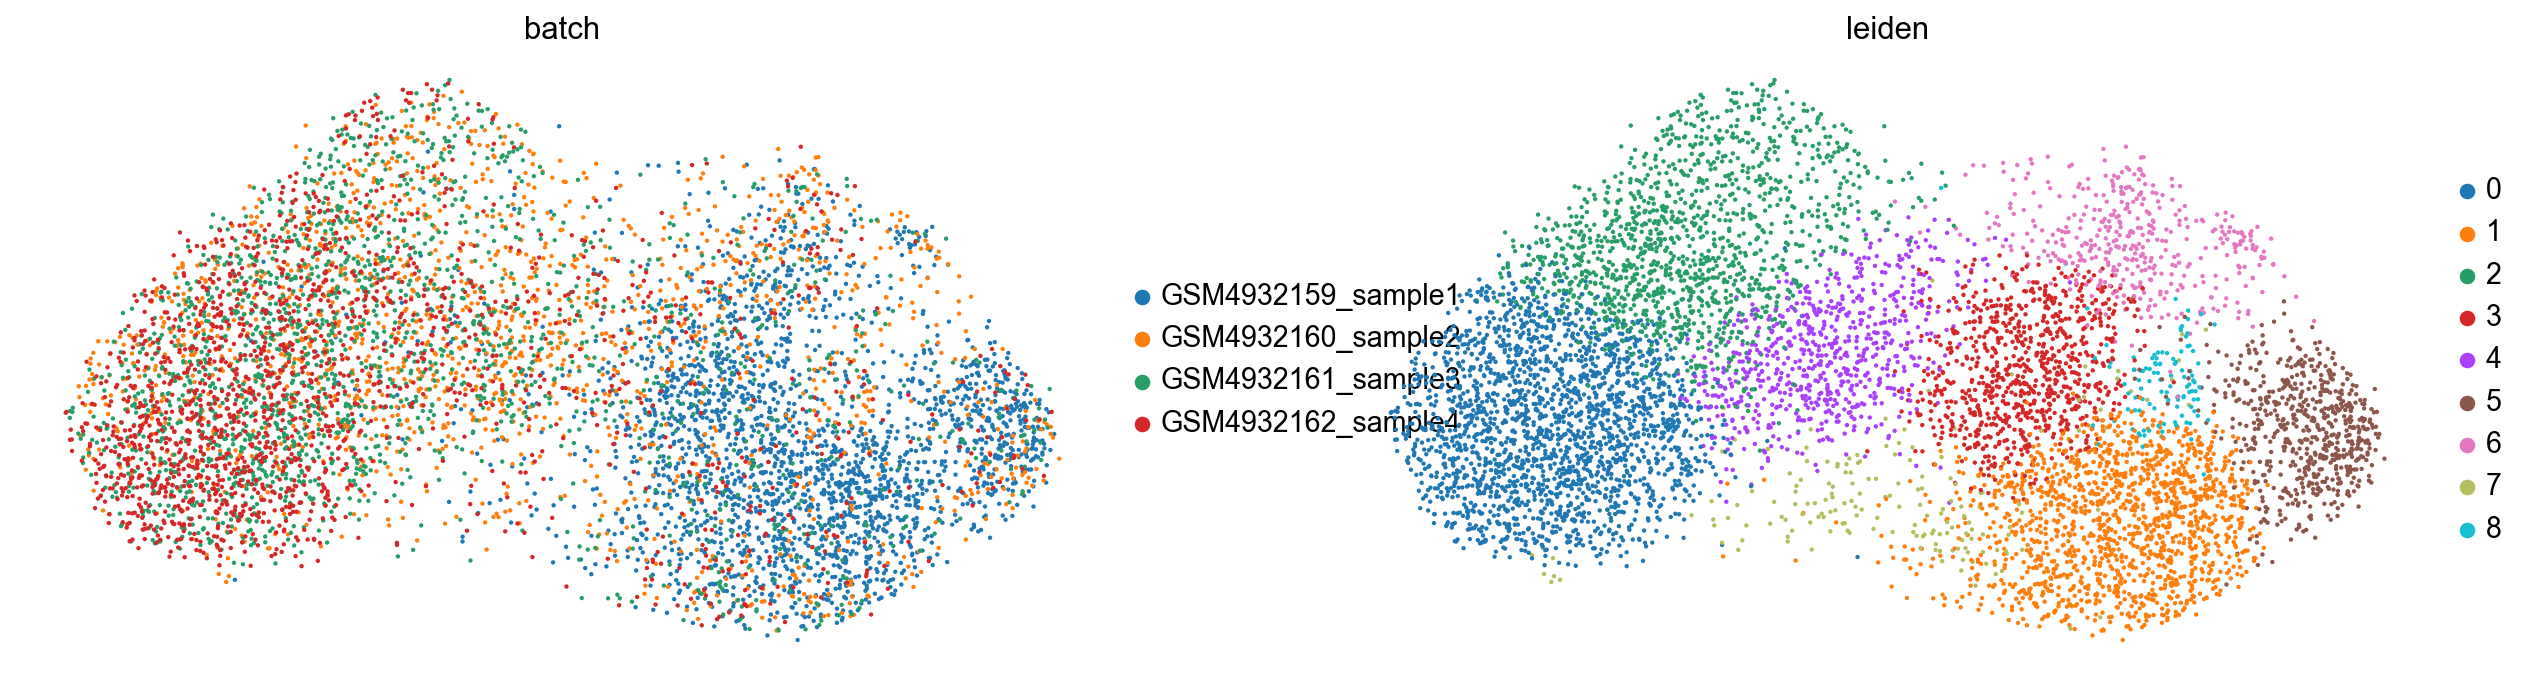

In [43]:
sc.pl.umap(adata, color=["batch", "leiden"], frameon=False)

In [44]:
cellphonedb(
    adata, groupby="leiden", use_raw=False, return_all_lrs=True, verbose=True
)

Using `.X`!
Converting to sparse csr matrix!
/Users/Shared/anaconda3/envs/IDIMENSIONS/lib/python3.9/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
/Users/Shared/anaconda3/envs/IDIMENSIONS/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
/Users/Shared/anaconda3/envs/IDIMENSIONS/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
12275 features of mat are empty, they will be removed.
/Users/Shared/anaconda3/envs/IDIMENSIONS/lib/python3.9/site-packages/liana/method/_pipe_utils/_pre.py:150: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/Users/Shared/anaconda3/envs/IDIMENSIONS/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: 

Generating ligand-receptor stats for 7736 samples and 1159 features


/Users/Shared/anaconda3/envs/IDIMENSIONS/lib/python3.9/site-packages/liana/resource/_reassemble_complexes.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/Users/Shared/anaconda3/envs/IDIMENSIONS/lib/python3.9/site-packages/liana/resource/_reassemble_complexes.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [45]:
adata.uns["liana_res"].head()

,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lrs_to_keep,lr_means,cellphone_pvals
155169,CALM1,CALM1,0.528152,1.0,HMMR,HMMR,1.883224,1.0,8,6,True,1.205688,0.0
150235,CALM1,CALM1,0.217729,1.0,HMMR,HMMR,1.883224,1.0,6,6,True,1.050476,0.0
137900,CALM1,CALM1,0.208926,1.0,HMMR,HMMR,1.883224,1.0,1,6,True,1.046075,0.0
142834,CALM1,CALM1,0.203681,1.0,HMMR,HMMR,1.883224,1.0,3,6,True,1.043452,0.0
140367,CALM1,CALM1,0.132220,1.0,HMMR,HMMR,1.883224,1.0,2,6,True,1.007722,0.0


In [46]:
def filter_func(df, key='cellphone_pvals', thres=0.05):
    return df[key] <= thres


/Users/Shared/anaconda3/envs/IDIMENSIONS/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


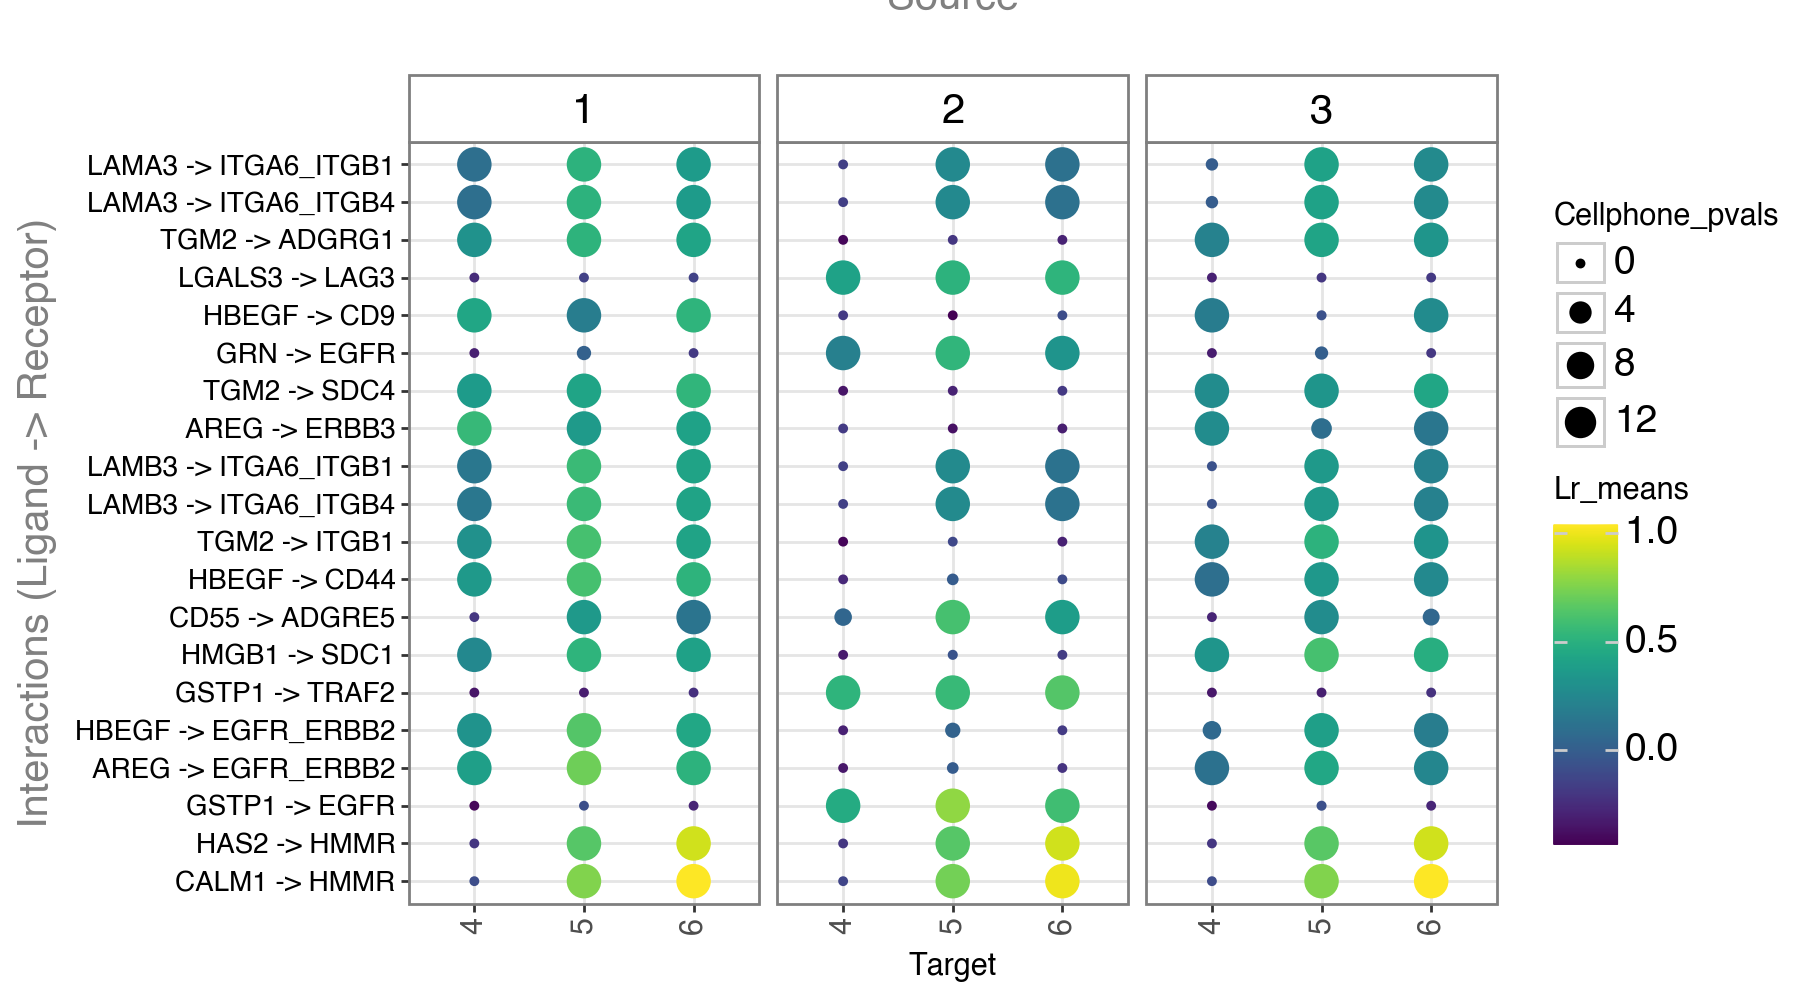

In [48]:
li.pl.dotplot(
    adata=adata,
    colour="lr_means",
    size="cellphone_pvals",
    inverse_size=True,  # we inverse sign since we want small p-values to have large sizes
    # We choose only the cell types which we wish to plot
    source_labels=["1", "2", "3"],
    target_labels=["4", "5", "6"],
    # since cpdbv2 suggests using a filter to FPs
    # we can filter the interactions according to p-values <= 0.01
    filter_fun=filter_func,
    # as this type of methods tends to result in large numbers
    # of predictions, we can also further order according to
    # expression magnitude
    orderby="lr_means",
    orderby_ascending=False,  # we want to prioritize those with highest expression
    top_n=20,  # and we want to keep only the top 20 interactions
    figure_size=(9, 5),
    size_range=(1, 6),
)

In [49]:
li.method.show_methods()

,Method Name,Magnitude Score,Specificity Score,Reference
0,CellPhoneDB,lr_means,cellphone_pvals,"Efremova, M., Vento-Tormo, M., Teichmann, S.A...."
0,Connectome,expr_prod,scaled_weight,"Raredon, M.S.B., Yang, J., Garritano, J., Wang..."
0,log2FC,None,lr_logfc,"Dimitrov, D., Türei, D., Garrido-Rodriguez, M...."
0,NATMI,expr_prod,spec_weight,"Hou, R., Denisenko, E., Ong, H.T., Ramilowski,..."
0,SingleCellSignalR,lrscore,None,"Cabello-Aguilar, S., Alame, M., Kon-Sun-Tack, ..."
0,Rank_Aggregate,magnitude_rank,specificity_rank,"Dimitrov, D., Türei, D., Garrido-Rodriguez, M...."
0,Geometric Mean,lr_gmeans,gmean_pvals,CellPhoneDBv2's permutation approach applied t...
0,scSeqComm,inter_score,None,"Baruzzo, G., Cesaro, G., Di Camillo, B. 2022. ..."
0,CellChat,lr_probs,cellchat_pvals,"Jin, S., Guerrero-Juarez, C.F., Zhang, L., Cha..."


In [ ]:
rank_aggregate(
    adata, groupby="leiden", return_all_lrs=True, use_raw=False, verbose=True
)

In [52]:
adata.uns["liana_res"].drop_duplicates(
    ["ligand_complex", "receptor_complex"]
).head()

,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,specificity_rank,magnitude_rank
0,0,0,ACE,BDKRB2,-0.012163,0.022,0.000146,0.024224,0.612938,0.003059,NaN,0.336386,NaN
1,0,0,ACTR2,ADRB2,0.012029,0.153,-0.014747,0.012029,-0.238042,0.086355,NaN,0.157442,NaN
2,0,0,ACTR2,LDLR,0.141502,0.000,0.019967,0.141502,0.309612,0.091831,1.047002,0.007912,NaN
3,0,0,ADA,DPP4,0.000862,0.116,-0.000170,0.021074,0.592107,-0.001780,NaN,0.442028,NaN
4,0,0,ADAM10,AXL,-0.108406,1.000,-0.178435,-0.108406,-0.175380,0.091047,NaN,1.000000,NaN


In [53]:
def filter_func(df, key='specificity_rank', thres=0.05):
    return df[key] <= thres


/Users/Shared/anaconda3/envs/IDIMENSIONS/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


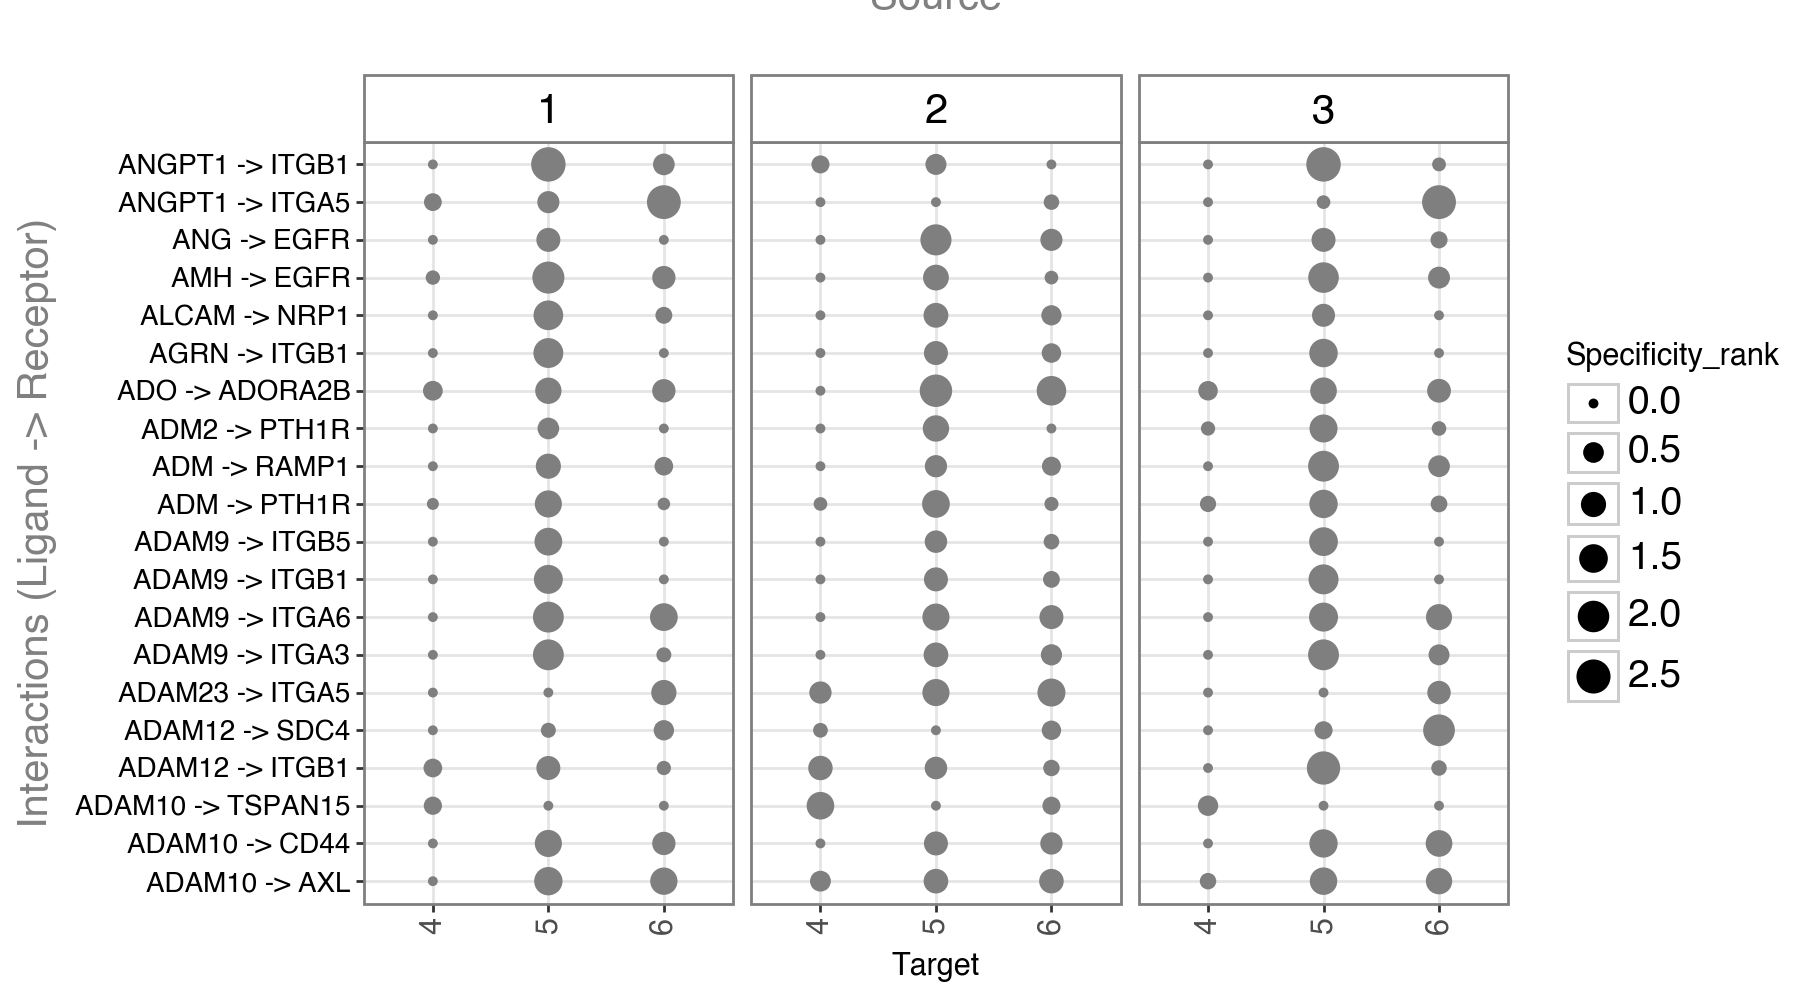

In [54]:
li.pl.dotplot(
    adata=adata,
    colour="magnitude_rank",
    size="specificity_rank",
    inverse_colour=True,  # we inverse sign since we want small p-values to have large sizes
    inverse_size=True,
    # We choose only the cell types which we wish to plot
    source_labels=["1", "2", "3"],
    target_labels=["4", "5", "6"],
    # since the rank_aggregate can also be interpreted as a probability distribution
    # we can again filter them according to their specificity significance
    # yet here the interactions are filtered according to
    # how consistently highly-ranked is their specificity across the methods
    filter_fun = filter_func,
    # again, we can also further order according to magnitude
    orderby="magnitude_rank",
    orderby_ascending=True,  # prioritize those with lowest values
    top_n=20,  # and we want to keep only the top 20 interactions
    figure_size=(9, 5),
    size_range=(1, 6),
)